In [1]:
import datajoint as dj

In [2]:
import ephys

Connecting daveliu@mesoscale-activity.datajoint.io:3306


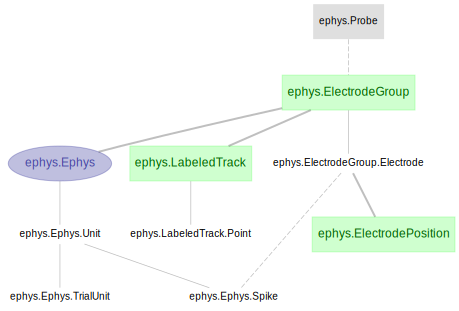

In [3]:
dj.ERD(ephys)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

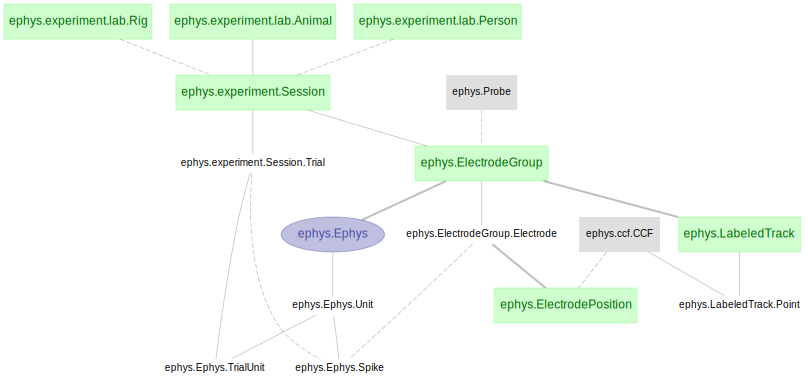

In [5]:
dj.ERD(ephys)-2

In [6]:
ephys.experiment.lab.Animal()

animal Janelia ANM ID (6 digits),dob,wr_num water restriction number
399752,2017-08-01,dl7


In [7]:
#mouse.drop()

In [8]:
mouse=ephys.experiment.lab.Animal()

In [9]:
mouse

animal Janelia ANM ID (6 digits),dob,wr_num water restriction number
399752,2017-08-01,dl7


In [10]:
#mouse.insert1((399752, '2017-08-01', 'dl7'))

In [11]:
person=ephys.experiment.lab.Person()
#person.insert1(('daveliu', 'Dave Liu'))
person

username,fullname
daveliu,Dave Liu


In [12]:
rig=ephys.experiment.lab.Rig()
#rig.insert1(('TRig1', 'Training rig 1'))
rig

rig,rig_description
TRig1,Training rig 1


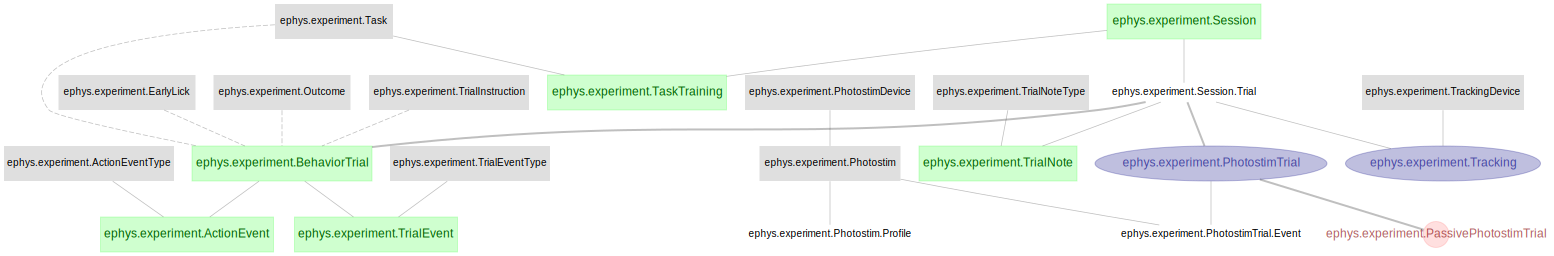

In [13]:
dj.ERD(ephys.experiment)

In [14]:
        import scipy.io as spio
        import numpy as np
        mat = spio.loadmat('R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171127_131041.mat', squeeze_me=True)
        SessionData=mat['SessionData']
        TrialTypes=SessionData.flatten()[0][0]
        RawData=SessionData.flatten()[0][7]
        TrialSettings=SessionData.flatten()[0][10]
        OriginalStateNamesByNumber=RawData.flatten()[0][0]
        OriginalStateData=RawData.flatten()[0][1]
        OriginalStateTimestamps=RawData.flatten()[0][3]
        OriginalEventTimestamps=RawData.flatten()[0][4]

In [15]:
PreSamplePeriod=np.where(OriginalStateNamesByNumber[0]=='PreSamplePeriod')[0]+1
StopLicking=np.where(OriginalStateNamesByNumber[200]=='StopLicking')[0]+1
DelayPeriod=np.where(OriginalStateNamesByNumber[111]=='DelayPeriod')[0]+1
startindex = np.where(OriginalStateData[0]==PreSamplePeriod)[0]
endindex = np.where(OriginalStateData[200]==StopLicking)[0]
delayindex = np.where(OriginalStateData[111]==DelayPeriod)[0]
startindex
OriginalStateTimestamps[0][startindex][0]
endindex
OriginalStateTimestamps[200][endindex[0]]
delayindex
OriginalStateTimestamps[111][delayindex[1]]

2.3300999999999998

In [16]:
sessionList = ['R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171114_144434.mat', 
               'R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171116_123237.mat',
               'R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171118_141139.mat',
               'R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171119_122727.mat',
               'R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171119_130846.mat',
               'R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171120_132218.mat',
               'R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171121_130431.mat',
               'R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171122_134619.mat',
               'R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171123_115915.mat',
               'R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171124_120916.mat',
               'R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171125_124353.mat',
               'R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171126_122207.mat',
               'R:\Arduino\Bpod_Train1\Bpod Local\Data\dl7\TW_autoTrain\Session Data\dl7_TW_autoTrain_20171127_131041.mat']

In [ ]:
session=ephys.experiment.Session()

In [ ]:
for i in range(0, len(sessionList)):
    print(i)
    session.insert1((399752, i, sessionList[i][86:90] + '-' + sessionList[i][91:93] + '-' + sessionList[i][92:94], 'daveliu', 'TRig1', sessionList[i]))
    key=session.fetch('animal', 'session')
    key1 = sessionList[i]
    session._make_tuples([key[0][i], key[1][i]], key1)

0
1
2
3
4
5
6
7
8
9
10
11
12


In [ ]:
#session.drop()

In [ ]:
trialNote = ephys.experiment.TrialNote()

In [ ]:
import numpy as np

In [ ]:
behaviorTrial = ephys.experiment.BehaviorTrial()

In [ ]:
outcome = behaviorTrial.fetch('outcome', order_by='session')
early_lick = behaviorTrial.fetch('early_lick', order_by='session')

In [ ]:
data = np.zeros(len(outcome))
data1 = np.zeros(len(early_lick))

In [ ]:
data[outcome=='hit'] = 1
data1[early_lick=='early'] = 1

In [ ]:
trial_note = trialNote.fetch('trial_note', order_by='session')
results = list(map(int, trial_note))
protDiff = np.diff(results)
protChange = np.where(protDiff != 0)

In [ ]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [ ]:
yMA = movingaverage(data,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Proportion Correct')
for i in range(0, len(protChange[0])):
    plt.axvline(protChange[0][i], linewidth=4, color='r')

In [ ]:
yMA = movingaverage(data1,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Early Licks')
for i in range(0, len(protChange[0])):
    plt.axvline(protChange[0][i], linewidth=4, color='r')